In [1]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy
import RelativeImportance
import Measure
import Generation


importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)
importlib.reload(RelativeImportance)
importlib.reload(Measure)
importlib.reload(Generation)

Loading BokehJS ...

<module 'Generation' from 'D:\\netSVG\\Generation.py'>

In [2]:
import os
dataset_config = config.DatasetConfig(scenario="HDPE", n_instance=1000)

assert(dataset_config.scenario == "HDPE"
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/HDPE already exists replacing files in this notebook


In [3]:
file_name_test = "../data/" + dataset_config.scenario+ "/test_data.txt"
X_test,Y_test = dataset.get_functional_test_data(file_name_test)

In [4]:
file_name_train = "../data/" + dataset_config.scenario+ "/train_data.txt"
X_train,Y_train = dataset.get_functional_train_data(file_name_train)

In [5]:
random_seed = 1985
if dataset_config.scenario == "HDPE":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.0001, lr_disc=0.0005, dec_gen=0, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )  

In [6]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[ 8.1800e-03  4.0000e-05 -3.7600e-03  1.0773e-01 -3.8700e-02  1.7171e-01
 -1.7004e-01 -1.3600e-03 -9.0000e-05 -3.7910e-02  2.6697e-01 -1.7640e-02
 -1.5300e-03  1.4000e-04 -0.0000e+00]
normal coefficient: 
1.34892
Standardized regression coefficient: 
[ 0.23134  0.05512 -0.09117  1.30966 -0.17357  0.31498 -0.19727 -0.04932
 -0.04644 -0.44258  0.35333 -0.12213 -0.06588  0.09435 -0.00906]
normal coefficient: 
-0.0


In [7]:
#if dataset_config.scenario == "HDPE":
    #imp = RelativeImportance.relativeImp_HDPE()
imp = [0.07555915247981852, 0.106243788125748, 0.1315452535980733, 0.11333353250172547, 0.060343159187365145, 
       0.022898801792272043, 0.03070757155570007, 0.07277711731849822, 0.07476087048666646, 0.040360742141438796, 
       0.15456686013486226, 0.021390811548312818, 0.015769859895590637, 0.02195257473534301, 0.057789904498585266]
#imp = list(imp.values())
print("The importance for every dimension:")
print(imp)

#os.exist(0)

The importance for every dimension:
[0.07555915247981852, 0.106243788125748, 0.1315452535980733, 0.11333353250172547, 0.060343159187365145, 0.022898801792272043, 0.03070757155570007, 0.07277711731849822, 0.07476087048666646, 0.040360742141438796, 0.15456686013486226, 0.021390811548312818, 0.015769859895590637, 0.02195257473534301, 0.057789904498585266]


In [8]:
length, max_dist = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
minist dist:
0.798
maxist imp:
0.15456686013486226
The original length of the smaple: 
[0.3901  0.54852 0.67914 0.58512 0.31154 0.11822 0.15854 0.37573 0.38598
 0.20838 0.798   0.11044 0.08142 0.11334 0.29836]


In [9]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 5.531905 and 5.950476in the dimension of No. 0
The value area of x in the sample is between 61.099048 and 83.608571in the dimension of No. 1
The value area of x in the sample is between 84.25 and 84.606in the dimension of No. 2
The value area of x in the sample is between 0.829524 and 1.0in the dimension of No. 3
The value area of x in the sample is between 0.789048 and 0.86in the dimension of No. 4
The value area of x in the sample is between 0.242857 and 0.270476in the dimension of No. 5
The value area of x in the sample is between 0.214 and 0.231429in the dimension of No. 6
The value area of x in the sample is between 76.940952 and 77.463846in the dimension of No. 7
The value area of x in the sample is between 44.881905 and 53.608889in the dimension of No. 8
The value area of x in the sample is between 0.93 and 1.109524in the dimension of No. 9
The value area of x in the sample is between 0.08 and 0.107273in the dimension of No. 10
The va

In [10]:
n_sample,length = sample.divide_sample(length, L, 300)

The number of diversions of the 0th dimension is: 2
2
The number of diversions of the 1th dimension is: 42
42
The number of diversions of the 2th dimension is: 1
1
The number of diversions of the 3th dimension is: 1
1
The number of diversions of the 4th dimension is: 1
1
The number of diversions of the 5th dimension is: 1
1
The number of diversions of the 6th dimension is: 1
1
The number of diversions of the 7th dimension is: 2
2
The number of diversions of the 8th dimension is: 23
23
The number of diversions of the 9th dimension is: 1
1
The number of diversions of the 10th dimension is: 1
1
The number of diversions of the 11th dimension is: 2
2
The number of diversions of the 12th dimension is: 12
12
The number of diversions of the 13th dimension is: 107
107
The number of diversions of the 14th dimension is: 12300
12300
总的样方分割数为：
122049849600
The number of diversions of the 0th dimension is: 1
1
The number of diversions of the 1th dimension is: 35
35
The number of diversions of the 2t

In [11]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为5.531905
第0维度的中心值有：
[24.13894]
第1维度，最小的x为61.099048
第1维度的中心值有：
[87.26241]
第2维度，最小的x为84.25
第2维度的中心值有：
[116.64369]
第3维度，最小的x为0.829524
第3维度的中心值有：
[28.73864]
第4维度，最小的x为0.789048
第4维度的中心值有：
[15.64892]
第5维度，最小的x为0.242857
第5维度的中心值有：
[5.88173]
第6维度，最小的x为0.214
第6维度的中心值有：
[7.77606]
第7维度，最小的x为76.940952
第7维度的中心值有：
[94.86256]
第8维度，最小的x为44.881905
第8维度的中心值有：
[63.29242]
第9维度，最小的x为0.93
第9维度的中心值有：
[10.86933]
第10维度，最小的x为0.08
第10维度的中心值有：
[38.14309]
第11维度，最小的x为0.2
第11维度的中心值有：
[5.46778]
第12维度，最小的x为1.9
第12维度的中心值有：
[5.78358]
第13维度，最小的x为12.095238
第13维度的中心值有：
[17.50134, 28.31355]
第14维度，最小的x为573.454545
第14维度的中心值有：
[587.68575, 616.14817, 644.61058, 673.073, 701.53541, 729.99783, 758.46024, 786.92266, 815.38507, 843.84749, 872.3099, 900.77232, 929.23473, 957.69715, 986.15957, 1014.62198, 1043.0844, 1071.54681, 1100.00923, 1128.47164, 1156.93406, 1185.39647, 1213.85889, 1242.3213, 1270.78372, 1299.24613, 1327.70855, 1356.17096, 1384.63338, 1413.09579, 1441.55821, 1470.02062, 1498.48304, 1526.94545, 1555.407

In [12]:
gen_sample_point = sample.gen_product2(gen_x)
print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

样方中心点：


In [13]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)
print("over")

over


In [14]:
sample_list = []
xlim_list = []

In [15]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)
print("over")

over


In [16]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)
print("over")

over


In [17]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)
print("over")

over


In [18]:
XLim.sample_feature(xlim_list, sample_list, x_value)
print("over")

over


In [19]:
XLim.add_xvalue(xlim_list)
#os.exist(0)

In [20]:
x_com, x_add = Generation.get_x_com(X_train, dim, x_value, x_value_ori)

In [21]:
E_dist = Generation.E_dist(x_com)
#os.exist(0)

In [22]:
gen_x = []
discard_list = []
Generation.gen_x_sample2(sample_list, gen_x, dim, x_max, x_min, n_sample, X_train)
#gen_x_cross = sample.gen_product(x_value)
print("over")

over


In [23]:
plot_xlim = copy.deepcopy(xlimit)
for index in range(dim):
    i = len(plot_xlim[index])
    plot_xlim[index][i-1] = x_max[index]
print("over")        

over


In [24]:
gen_x_checked = []
XLim.check2(sample_list, xlim_list, gen_x_checked, discard_list, gen_x)
XLim.sample_attri(sample_list, X_train, gen_x_checked, Y_train)
XLim.xl_attri(xlim_list, X_train, gen_x_checked)
gen_x = np.array(gen_x)

In [25]:
import GPy

noise = 0.5
length_ = 0.5
noise_var = exp_config.model.z_input_size
run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=12, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel, noise_var=noise_var)
if run_hyperopt_search:
    gpr.optimize(messages=True) 
print("over")

 D:\CondaEnv\netSVGpython36\lib\site-packages\GPy\core\gp.py:87: UserWarning:Your kernel has a different input dimension 12 then the given X dimension 15. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


over


In [26]:
gen_y_cross, cov_train_cross = gpr.predict(gen_x)
print("over")

over


In [27]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [28]:
point_list = []
Point.con_point(gen_x, gen_y_cross, point_list)
print("over")

over


In [29]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)
print("over")

over


In [30]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.8819
Model:                       QuantReg   Bandwidth:                   0.0004652
Method:                 Least Squares   Sparsity:                     0.001371
Date:                Mon, 26 Oct 2020   No. Observations:                  150
Time:                        10:28:33   Df Residuals:                      134
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0507      0.280      0.181      0.857      -0.504       0.605
x1             0.0281      0.005      6.040      0.000       0.019       0.037
x2          5.096e-05   2.52e-05      2.024      0.045    1.15e-06       0.000
x3             0.0104      0.003      3.667      0.0

In [31]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))
print("over")

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	0.0424	[ 0.0277  0.      0.0096  0.1717 -0.1038  0.1618  0.0365 -0.0009 -0.0004
 -0.0391  0.3562 -0.0199 -0.0045  0.     -0.    ]
0.15	0.0591	[ 0.0281  0.      0.0101  0.1678 -0.099   0.1167  0.1119 -0.0017 -0.0004
 -0.0402  0.3393 -0.0176 -0.0041  0.0001 -0.    ]
0.25	0.0452	[ 0.0286  0.0001  0.0104  0.1642 -0.0835  0.0969  0.1168 -0.002  -0.0003
 -0.0401  0.3578 -0.0172 -0.0039  0.0001 -0.    ]
0.35	0.0338	[ 0.03    0.      0.0092  0.1911 -0.1147  0.1848  0.0287 -0.0006 -0.0002
 -0.0454  0.3518 -0.0204 -0.0036  0.0001 -0.    ]
0.45	1.6775	[ 0.0037  0.0001 -0.0082  0.0879 -0.0244  0.1403 -0.2371 -0.0001 -0.
 -0.0314  0.2245 -0.0233 -0.0016  0.0002 -0.    ]
0.55	0.096	[ 0.0262  0.      0.009   0.155  -0.0588  0.0748  0.1795 -0.0014 -0.0002
 -0.0433  0.4042 -0.0194 -0.0033  0.0001 -0.    ]
0.65	0.0722	[ 0.0251  0.0001  0.0087  0.1494 -0.0721  0.1256  0.0558 -0.0003 -0.0003
 -0.0299  0.3653 -0.0227 -0.0037  0.     -0.    ]
0.75	0.0588	[ 0.0268  0.      0.009   0.16   -0.08    0.1309

In [32]:
y_quantile = [1.017,1.018,1.019,1.019,1.020,1.021,1.023,1.027,1.028,1.029]

In [33]:

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()
print("over")

over


In [34]:
vir_xpoint = []
vir_ypoint = []
del_list = []
QRselection.qr_selection2(xlim_list, models, vir_xpoint, vir_ypoint, y_quantile, ols, x_value_ori,
                 n_sample, X_train, Y_train, sample_list, point_list, x_value)
print("over")

over


In [35]:
i = 0
for point in point_list:
    if point.checked == 1:
        i += 1
print("over")

over


In [36]:
from hpelm import ELM
elm_old = ELM(15, 1)
elm_old.add_neurons(70, "sigm")
#elm.add_neurons(10, "rbf_l2")
elm_old.train(np.array(X_train), np.array(Y_train))
y_predict_old = elm_old.predict(X_test)

elm_new = ELM(15, 1)
elm_new.add_neurons(70, "sigm")
#elm.add_neurons(10, "rbf_l2")
#elm_new.train(np.array(vir_xpoint), np.array(vir_ypoint), "LOO")
add_x_train = dataset.add_train(X_train, np.array(vir_xpoint))
add_y_train = dataset.add_train(Y_train, np.array(vir_ypoint))
elm_new.train(np.array(add_x_train), np.array(add_y_train))
y_predict_new = elm_new.predict(X_test)

test_list = []
for i in range(len(X_test)):
    test_point = Point.TestPoint(X_test[i], Y_test[i], y_predict_old[i], y_predict_new[i])
    test_list.append(test_point)
print("over")

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
over


 D:\CondaEnv\netSVGpython36\lib\site-packages\hpelm\nnets\slfn.py:62: RuntimeWarning:overflow encountered in exp
 D:\CondaEnv\netSVGpython36\lib\site-packages\hpelm\nnets\slfn_python.py:65: FutureWarning:`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


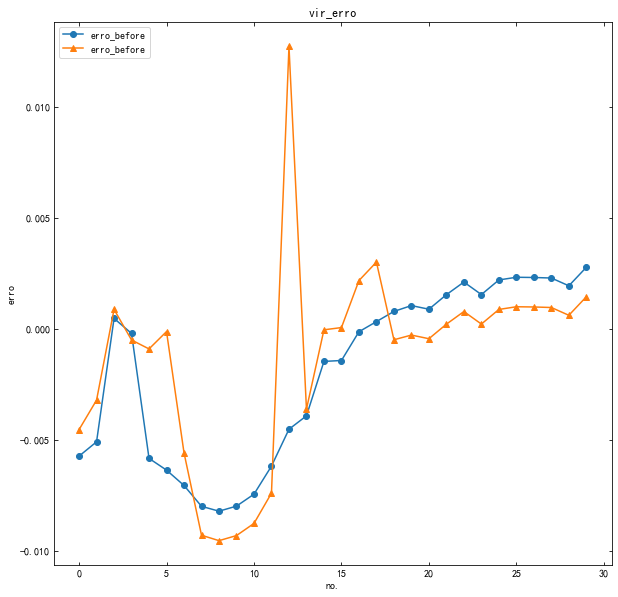

In [37]:
 
plotting.plot_erro2(test_list, exp_config, fig_dir, "vir_erro")

In [38]:
'''
del_point_l = []
for i in range(len(del_list)):
    del_point = Point.TestPoint(X_test[i], Y_test[i], y_predict_old[i], y_predict_new[i])
    test_list.append(test_point)
print("over")
plotting.plot_erro2(test_list, exp_config, fig_dir, "del_erro")'''

'\ndel_point_l = []\nfor i in range(len(del_list)):\n    del_point = Point.TestPoint(X_test[i], Y_test[i], y_predict_old[i], y_predict_new[i])\n    test_list.append(test_point)\nprint("over")\nplotting.plot_erro2(test_list, exp_config, fig_dir, "del_erro")'

In [39]:
mae_old, mae_new = Measure.mae2(test_list)
mse_old, mse_new = Measure.mse2(test_list)
mape_old, mape_new = Measure.mape2(test_list)
print(" all test point")
print(mae_old)
print(mae_new)
print(mse_old)
print(mse_new)
print(mape_old)
print(mape_new)

 all test point
[0.00339907]
[0.00299459]
[0.00001845]
[0.00002177]
[0.00331247]
[0.00291598]


In [40]:

np.savetxt("../figures/HDPE/vx_data.txt", np.array(vir_xpoint),fmt='%.8f',delimiter=' ')

In [41]:
np.savetxt("../figures/HDPE/vy_data.txt", np.array(vir_ypoint),fmt='%.8f',delimiter=' ')



